In [1]:
import os
import subprocess
import sys
def train_model(data_yaml, weights='./yolov5s.pt', img_size=640, batch_size=16, epochs=50):
    """Train the YOLOv5 model."""
    # Ensure the 'yolov5' directory is in your Python path or adjust the command accordingly
    command = [
        "python", "yolov5/train.py",
        "--img", str(img_size),
        "--batch", str(batch_size),
        "--epochs", str(epochs),
        "--data", data_yaml,
        "--weights", weights,
        "--cache"
    ]
    subprocess.run(command)

# Path to your dataset configuration file
dataset_yaml = './dataset_torch/data.yaml'

# Train the model
train_model(dataset_yaml)


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-283-g875d927 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)


Setup complete  (16 CPUs, 15.7 GB RAM, 472.8/476.1 GB disk)


Traceback (most recent call last):
  File "c:\Users\Faturrahman\Downloads\Bahan_Skripsi\yolov5\detect.py", line 38, in <module>
    import torch
  File "c:\Users\Faturrahman\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py", line 129, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "c:\Users\Faturrahman\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\lib\cudnn_cnn_infer64_8.dll" or one of its dependencies.


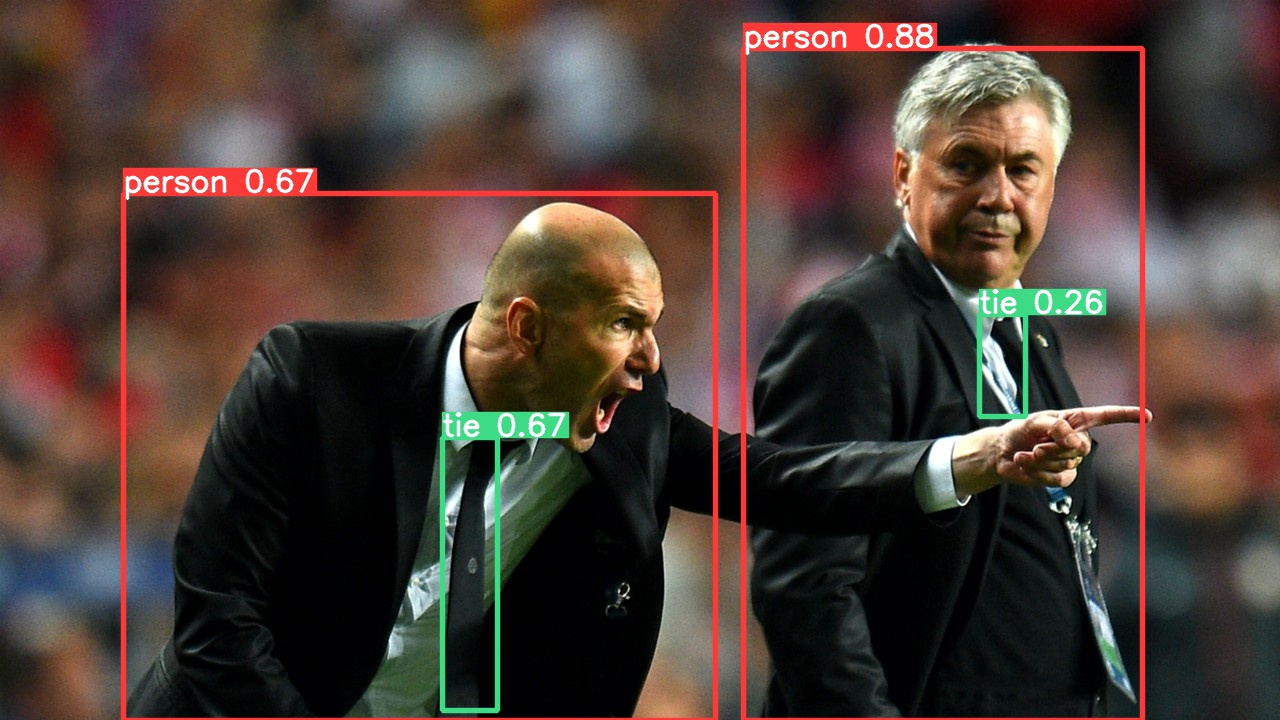

In [3]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp7/zidane.jpg', width=600)

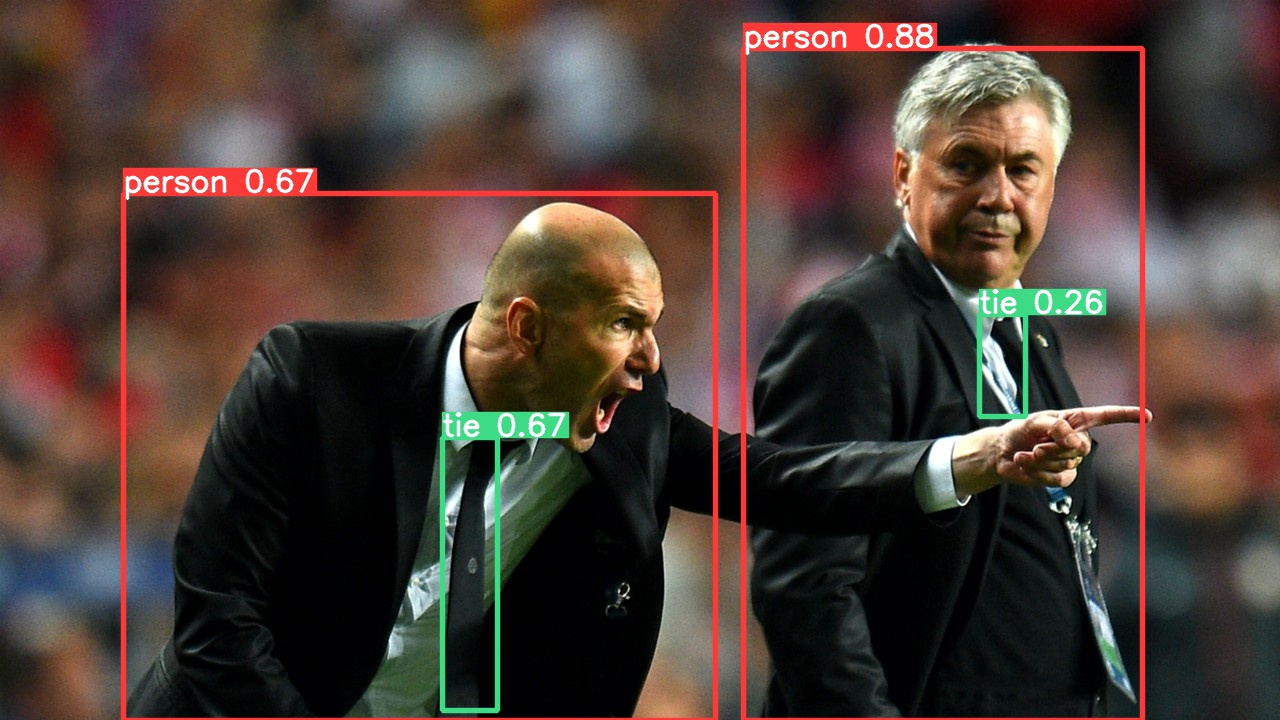

In [4]:
display.Image(filename='runs/detect/exp7/zidane.jpg', width=600)

In [5]:
import torch
print(torch.__version__)

1.12.1+cu113


In [6]:
import torch
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Device Count:", torch.cuda.device_count())
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")

CUDA Available: True
CUDA Device Count: 1
Device 0: NVIDIA GeForce RTX 3050 Laptop GPU


In [1]:
!python train.py --img 128 --batch 16 --epochs 10 --data dataset_torch/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset_ocr/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
From https://github.com/ultralytics/yolov5
   875d927..b939236  master     -> origin/master
github:  YOLOv5 is out of date by 5 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-283-g875d927 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop 

In [1]:
!tensorboard --logdir runs\train
!python train.py --img 128 --batch 16 --epochs 10 --data dataset_ocr/data.yaml --weights yolov5s.pt --cache

^C


train: weights=yolov5s.pt, cfg=, data=dataset_ocr/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 5 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-283-g875d927 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, war

In [8]:
# Import necessary libraries
import torch
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Import YOLOv5 modules
from models.experimental import attempt_load
from utils.general import non_max_suppression, scale_boxes
from utils.dataloaders import LoadImages
from utils.plots import plot_one_box

# Model weights path
weights_path = './best.pt'  # Update this path as necessary

# Determine device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model without specifying map_location
model = attempt_load(weights_path, device=device)  # Load the trained model

# Model stride and image size
stride = int(model.stride.max())  # Model stride
imgsz = 128  # Define image size (should be adjusted based on your use case)

# Assuming necessary imports and model loading are done above

def detect_first_image(source='./dataset_torch/test/images', conf_thres=0.25, iou_thres=0.45):
    dataset = LoadImages(source, img_size=imgsz, stride=stride)
    for path, img, im0s, _ in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.float()  # Convert from uint8 to fp16/32
        img /= 255.0  # Normalize from 0-255 to 0.0-1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)  # Add batch dimension
        
        # Inference
        pred = model(img, augment=False)[0]
        
        # Apply NMS (Non-Maximum Suppression)
        pred = non_max_suppression(pred, conf_thres, iou_thres)
        
        # Process detections
        for i, det in enumerate(pred):  # Detections per image
            p, im0 = path, im0s.copy()
            p = Path(p)  # Convert to Path object
            
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], im0.shape).round()
                
                # Write results
                for *xyxy, conf, cls in reversed(det):
                    label = f'{conf:.2f}'
                    plot_one_box(xyxy, im0, label=label, color=(255,0,0), line_thickness=3)
            
            # Display the first image and its detections
            plt.imshow(im0)
            plt.title(p.name)
            plt.show()
            
            # Break after the first image
            return

# Perform detection on the first image in the test folder
detect_first_image('./dataset_torch/test/images')


NotImplementedError: cannot instantiate 'PosixPath' on your system

In [ ]:
# Import necessary libraries
import torch
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Import YOLOv5 modules
from models.experimental import attempt_load
from utils.general import non_max_suppression, scale_boxes
from utils.dataloaders import LoadImages
from utils.plots import plot_one_box
from utils.augmentations import letterbox

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Model weights path
weights_path = './runs/train/exp3/weights/best.pt'  # Update this path as necessary

# Determine device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model without specifying map_location
model = attempt_load(weights_path, device=device)  # Load the trained model

# Model stride and image size
stride = int(model.stride.max())  # Model stride
imgsz = 128  # Define image size (should be adjusted based on your use case)

# Assuming necessary imports and model loading are done above

def detect_single_image(image_path, conf_thres=0.25, iou_thres=0.45, imgsz=640):
    # Load the image
    img0 = cv2.imread(image_path)  # BGR
    assert img0 is not None, f'Image Not Found {image_path}'
    
    # Padded resize
    img = letterbox(img0, imgsz, stride=stride)[0]

    # Convert
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)

    img = torch.from_numpy(img).to(device)
    img = img.float()  # uint8 to fp32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)

    # Inference
    pred = model(img, augment=False)[0]

    # Apply NMS
    pred = non_max_suppression(pred, conf_thres, iou_thres)

    # Process detections
    for i, det in enumerate(pred):  # detections for image i
        if len(det):
            # Rescale boxes from img_size to img0 size
            det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], img0.shape).round()

            # Write results
            for *xyxy, conf, cls in reversed(det):
                label = f'{cls} {conf:.2f}'
                plot_one_box(xyxy, img0, label=label, color=(255,0,0), line_thickness=3)

    # Display the image
    # After processing detections
    cv2.imwrite('result2.jpg', cv2.cvtColor(img0, cv2.COLOR_RGB2BGR))  # Save the result image

    # # Optionally, you can comment out plt.imshow and plt.show if running headlessly
    # plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))
    # plt.title(Path(image_path).name)
    # plt.show()


# Call the function with the path to your image
image_path = '../WhatsApp Image 2024-02-07 at 20.27.54_989cf681.jpg'  # Update this to the path of your image
detect_single_image(image_path)


Fusing layers... 
Model summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs


In [1]:
import torch
from pathlib import Path
import numpy as np
import cv2
from matplotlib import pyplot as plt

# YOLOv5 imports
from models.experimental import attempt_load
from utils.general import non_max_suppression, scale_boxes
from utils.augmentations import letterbox

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Assuming YOLOv5's utils and models are in the Python path

# Replace with the path to your YOLOv5 model weights
weights_path = './runs/train/exp3/weights/best.pt'

# Determine device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load model
model = attempt_load(weights_path, device=device)
stride = int(model.stride.max())

def detect_and_crop_objects(image_path, conf_thres=0.25, iou_thres=0.45, imgsz=640):
    # Load image
    img0 = cv2.imread(image_path)
    assert img0 is not None, f'Image Not Found {image_path}'

    # Padded resize
    img = letterbox(img0, imgsz, stride=stride)[0]

    # Convert
    img = img[:, :, ::-1].transpose(2, 0, 1)
    img = np.ascontiguousarray(img)

    # To device
    img = torch.from_numpy(img).to(device)
    img = img.float() / 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)

    # Inference
    pred = model(img, augment=False)[0]

    # Apply NMS
    pred = non_max_suppression(pred, conf_thres, iou_thres)

    cropped_images = []

    # Process detections
    for i, det in enumerate(pred):
        if len(det):
            # Rescale boxes
            det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], img0.shape).round()

            for *xyxy, conf, cls in reversed(det):
                x1, y1, x2, y2 = map(int, xyxy)
                cropped_img = img0[y1:y2, x1:x2]
                cropped_images.append(cropped_img)

    return cropped_images

# Update the path to your image
image_path = '../WhatsApp Image 2024-02-29 at 10.52.07_53200468.jpg'
cropped_images = detect_and_crop_objects(image_path)

for i, cropped_img in enumerate(cropped_images):
    # Save each cropped image
    save_path = f'cropped_15.jpg'
    cv2.imwrite(save_path, cropped_img)
    print(f"Cropped Image {i+1} saved as {save_path}.")

    # Display each cropped image
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped Image {i+1}')
    plt.axis('off')

plt.show()

Fusing layers... 
Model summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs


Cropped Image 1 saved as cropped_15.jpg.
Cropped Image 2 saved as cropped_15.jpg.


Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-5 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 
image 1/1: 640x640 (no detections)
Speed: 6.2ms pre-process, 10.3ms inference, 119.8ms NMS per image at shape (1, 3, 640, 640)


    X1     Y1     X2     Y2   Confidence  Class


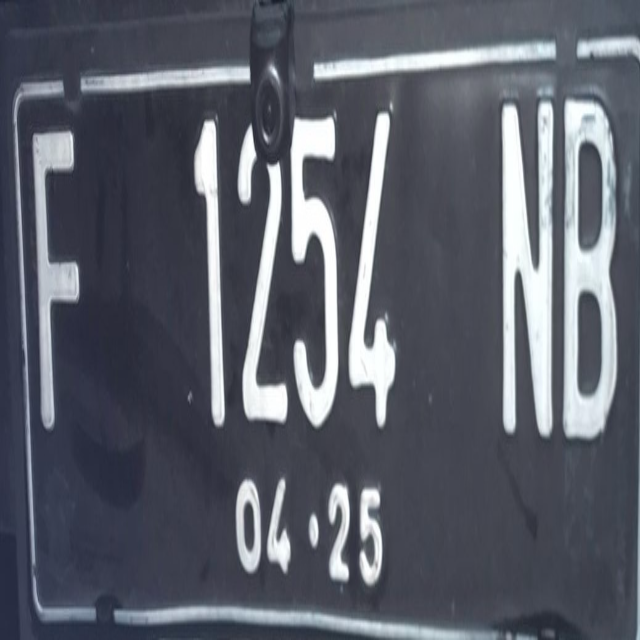

tensor([], device='cuda:0', size=(0, 6))


In [3]:
import cv2
from PIL import Image
import numpy as np
import torch

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp35/weights/best.pt')

# Load an image
img_pil = Image.open('./cropped_3.jpg')
img_np = np.array(img_pil)
img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
img_resized = cv2.resize(img_bgr, (640, 640))
img_normalized = img_resized / 255.0
img_pil_ready = Image.fromarray((img_normalized * 255).astype(np.uint8))

# Inference
results = model(img_pil_ready)

# Detected objects as a tensor
detected_objects = results.xyxy[0]

# Sort detections by X1 value
detections_sorted = detected_objects[detected_objects[:, 0].argsort()]

# Mapping class IDs to their corresponding labels
names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

# Print a header for better readability
print(f"{'X1':>6} {'Y1':>6} {'X2':>6} {'Y2':>6} {'Confidence':>12} {'Class':>6}")

# Iterate through each sorted detection and print the results with class names
for detection in detections_sorted:
    x1, y1, x2, y2, conf, cls_id = detection
    class_name = names[int(cls_id.item())]  # Convert class ID to corresponding class name
    print(f"{x1.item():6.2f} {y1.item():6.2f} {x2.item():6.2f} {y2.item():6.2f} {conf.item():12.8f} {class_name:>6}")

results.print()
results.show()

# Print detected bounding box, confidence and class
print(results.xyxy[0])


Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-5 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 
image 1/1: 182x543 1 5, 1 8, 3 9s, 2 Bs, 2 Js
Speed: 1.0ms pre-process, 9.4ms inference, 2.5ms NMS per image at shape (1, 3, 224, 640)


    X1     Y1     X2     Y2   Confidence  Class
  1.82  25.61  59.57 122.39   0.86921072      B
 95.97  26.78 156.03 121.04   0.58078498      9
 96.18  27.30 151.22 119.14   0.48525420      8
147.88  24.38 207.78 124.03   0.72779918      9
203.78  26.11 262.80 125.27   0.82861918      5
255.97  26.37 320.45 125.29   0.75139707      9
364.94  23.23 418.11 124.84   0.82497895      J
422.19  23.12 477.76 124.57   0.70301878      J
475.04  22.88 529.53 124.58   0.75798678      B


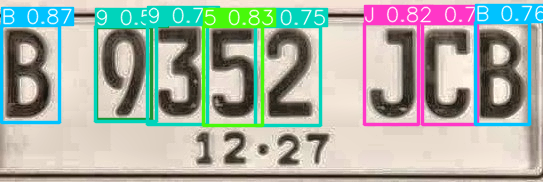

tensor([[1.82015e+00, 2.56104e+01, 5.95660e+01, 1.22389e+02, 8.69211e-01, 1.10000e+01],
        [2.03782e+02, 2.61102e+01, 2.62800e+02, 1.25272e+02, 8.28619e-01, 5.00000e+00],
        [3.64944e+02, 2.32314e+01, 4.18107e+02, 1.24845e+02, 8.24979e-01, 1.90000e+01],
        [4.75044e+02, 2.28783e+01, 5.29535e+02, 1.24580e+02, 7.57987e-01, 1.10000e+01],
        [2.55973e+02, 2.63701e+01, 3.20446e+02, 1.25289e+02, 7.51397e-01, 9.00000e+00],
        [1.47882e+02, 2.43757e+01, 2.07779e+02, 1.24034e+02, 7.27799e-01, 9.00000e+00],
        [4.22193e+02, 2.31170e+01, 4.77762e+02, 1.24568e+02, 7.03019e-01, 1.90000e+01],
        [9.59748e+01, 2.67781e+01, 1.56035e+02, 1.21035e+02, 5.80785e-01, 9.00000e+00],
        [9.61801e+01, 2.73021e+01, 1.51224e+02, 1.19144e+02, 4.85254e-01, 8.00000e+00]], device='cuda:0')


In [32]:
import cv2
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp37/weights/best.pt')

# Load an image
img_pil = Image.open('./cropped_5.jpg')
img_np = np.array(img_pil)
img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(img_bgr):
    img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(img_lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    img_lab_clahe = cv2.merge((l_clahe, a, b))
    img_bgr_clahe = cv2.cvtColor(img_lab_clahe, cv2.COLOR_Lab2BGR)
    return img_bgr_clahe

img_bgr_clahe = apply_clahe(img_bgr)

# Resize and normalize the image
# img_resized = cv2.resize(img_bgr_clahe, (640, 640))
img_normalized = img_bgr_clahe/ 255.0
img_pil_ready = Image.fromarray((img_normalized * 255).astype(np.uint8))

# Inference
results = model(img_pil_ready)

# Detected objects as a tensor
detected_objects = results.xyxy[0]

# Sort detections by X1 value
detections_sorted = detected_objects[detected_objects[:, 0].argsort()]

# Mapping class IDs to their corresponding labels
names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

# Print a header for better readability
print(f"{'X1':>6} {'Y1':>6} {'X2':>6} {'Y2':>6} {'Confidence':>12} {'Class':>6}")

# Iterate through each sorted detection and print the results with class names
for detection in detections_sorted:
    x1, y1, x2, y2, conf, cls_id = detection
    class_name = names[int(cls_id.item())]  # Convert class ID to corresponding class name
    print(f"{x1.item():6.2f} {y1.item():6.2f} {x2.item():6.2f} {y2.item():6.2f} {conf.item():12.8f} {class_name:>6}")

# Convert the resized BGR image back to RGB for display
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Draw rectangles and labels on the image
for detection in detections_sorted:
    x1, y1, x2, y2, conf, cls_id = detection
    start_point = (int(x1), int(y1))
    end_point = (int(x2), int(y2))
    color = (255, 0, 0)  # Blue color in RGB
    thickness = 2
    cv2.rectangle(img_rgb, start_point, end_point, color, thickness)

    class_name = names[int(cls_id.item())]
    label = f"{class_name} {conf.item():.2f}"
    cv2.putText(img_rgb, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

results.print()
results.show()

# Print detected bounding box, confidence and class
print(results.xyxy[0])


In [10]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import torch 

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp35/weights/best.pt')

def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

def recognize_license_plate(plate_image):
    gray_plate = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    # Apply some additional processing here if needed like thresholding
    return pytesseract.image_to_string(gray_plate, config='--psm 7 --oem 3')

# Load the image from the uploaded path
image_path = './cropped_15.jpg'
plate_image = cv2.imread(image_path)

if plate_image is None:
    print("Image not found or unable to read.")
else:
    # Assuming the plate might need rotation correction
    gray_plate = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_plate, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if np.degrees(theta) > 45:
                angle = np.degrees(theta) - 90
                rotated_plate = rotate_image(plate_image, angle)
                # Assuming you want to display the rotated plate using matplotlib
                plt.imshow(cv2.cvtColor(rotated_plate, cv2.COLOR_BGR2RGB))
                plt.title('Rotated License Plate')
                plt.axis('off')
                plt.show()

                plate_text = recognize_license_plate(rotated_plate)
                print("Rotated Plate Number:", plate_text)
                break
    else:
        # Assuming you want to display the plate using matplotlib
        plt.imshow(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))
        plt.title('License Plate')
        plt.axis('off')
        plt.show()
        plate_text = recognize_license_plate(plate_image)
        print("Plate Number:", plate_text)
    
    # Perform detection on the plate
    results = model(plate_image)

    # Results
    results.print()
    results.show()

    # Print detected bounding box, confidence and class
    print(results.xyxy[0])

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [7]:
from PIL import Image
import torch
import cv2
import numpy as np
import pathlib

# Setup paths (modify as per your setup)
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp30/weights/best.pt')

# Load an image with PIL
img_path = './cropped_13.jpg'
img = Image.open(img_path)

# Convert PIL Image to OpenCV format for preprocessing
img_cv = np.array(img)
img_cv = img_cv[:, :, ::-1].copy()  # Convert RGB to BGR

# Preprocess the image with OpenCV
gray_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
edges = cv2.Canny(gray_img, 100, 200)  # Apply Canny edge detection

# Convert preprocessed image back to PIL Image for inference
img_pil_preprocessed = Image.fromarray(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB))

# Perform inference on the preprocessed image
results = model(img_pil_preprocessed)

# Print detected bounding boxes, confidence, and class from the preprocessed image
print(results.xyxy[0])

# To show bounding boxes on the original RGB image:
# Convert the results.xyxy[0] tensor to numpy for easier manipulation
detections = np.array(results.xyxy[0])

# Draw bounding boxes on the original image (in OpenCV format)
for detection in detections:
    x1, y1, x2, y2, conf, cls = detection
    start_point = (int(x1), int(y1))
    end_point = (int(x2), int(y2))
    color = (255, 0, 0)  # Blue color in BGR
    thickness = 2
    img_cv = cv2.rectangle(img_cv, start_point, end_point, color, thickness)

# Convert back to RGB and then to PIL for display
img_rgb_with_boxes = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
img_pil_with_boxes = Image.fromarray(img_rgb_with_boxes)

# Display the original image with bounding boxes
img_pil_with_boxes.show()

Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-5 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


tensor([], device='cuda:0', size=(0, 6))


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-5 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


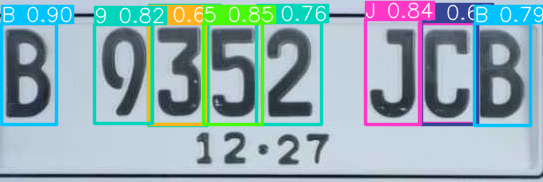

tensor([[1.34109e+00, 2.32110e+01, 5.62038e+01, 1.24149e+02, 8.97318e-01, 1.10000e+01],
        [2.03856e+02, 2.31737e+01, 2.62574e+02, 1.24207e+02, 8.46205e-01, 5.00000e+00],
        [3.65364e+02, 1.95553e+01, 4.20238e+02, 1.24580e+02, 8.40293e-01, 1.90000e+01],
        [9.44480e+01, 2.45498e+01, 1.52096e+02, 1.23643e+02, 8.17391e-01, 9.00000e+00],
        [4.74814e+02, 2.31257e+01, 5.30094e+02, 1.25375e+02, 7.92574e-01, 1.10000e+01],
        [2.56277e+02, 2.27273e+01, 3.21469e+02, 1.24419e+02, 7.64183e-01, 9.00000e+00],
        [1.48538e+02, 2.31524e+01, 2.05565e+02, 1.24437e+02, 6.55765e-01, 3.00000e+00],
        [4.21597e+02, 2.10641e+01, 4.77316e+02, 1.24327e+02, 6.30794e-01, 1.20000e+01],
        [4.19895e+02, 2.31766e+01, 4.77118e+02, 1.23957e+02, 5.82720e-01, 1.90000e+01],
        [1.48256e+02, 2.25971e+01, 2.07795e+02, 1.25062e+02, 3.40695e-01, 9.00000e+00],
        [1.49618e+02, 2.23275e+01, 2.08648e+02, 1.24983e+02, 2.57035e-01, 5.00000e+00]], device='cuda:0')


In [2]:
from PIL import Image
import torch

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp37/weights/best.pt')

# Load an image
img = Image.open('./cropped_5.jpg')

# Inference
results = model(img)

# Results
results.show()  # Show the image with bounding boxes
print(results.xyxy[0])  # Print detected bounding box, confidence and class


Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  v7.0-283-g875d927 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


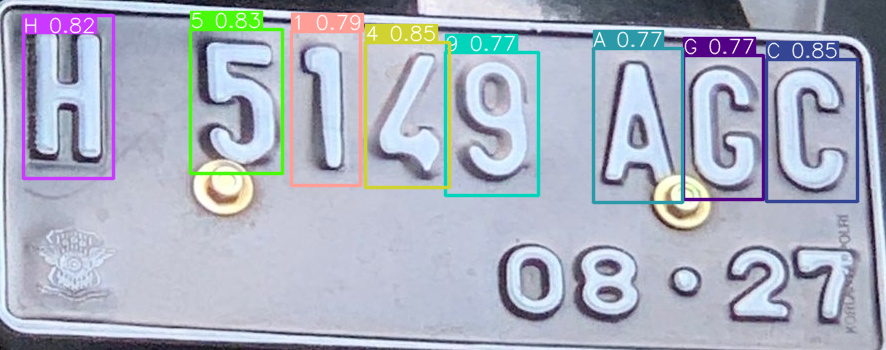

tensor([[3.65123e+02, 4.26221e+01, 4.49364e+02, 1.87761e+02, 8.51922e-01, 4.00000e+00],
        [7.66577e+02, 5.95947e+01, 8.57507e+02, 2.01603e+02, 8.49593e-01, 1.20000e+01],
        [1.90407e+02, 2.91291e+01, 2.82260e+02, 1.73204e+02, 8.27340e-01, 5.00000e+00],
        [2.37262e+01, 1.53030e+01, 1.13017e+02, 1.78720e+02, 8.21790e-01, 1.70000e+01],
        [2.91445e+02, 3.10582e+01, 3.60305e+02, 1.85538e+02, 7.85634e-01, 1.00000e+00],
        [5.93036e+02, 4.89522e+01, 6.82298e+02, 2.02604e+02, 7.74141e-01, 1.00000e+01],
        [6.83132e+02, 5.53847e+01, 7.63646e+02, 1.99478e+02, 7.72349e-01, 1.60000e+01],
        [4.45266e+02, 5.21568e+01, 5.38509e+02, 1.95192e+02, 7.68519e-01, 9.00000e+00]], device='cuda:0')


In [13]:
from PIL import Image
import torch

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp37/weights/best.pt')

# Load an image
img = Image.open('./cropped_15.jpg')

# Inference
results = model(img)

# Results
results.show()  # Show the image with bounding boxes
print(results.xyxy[0])  # Print detected bounding box, confidence and class

In [12]:
import cv2
import torch
import pandas as pd

# Correctly set paths for compatibility on non-Unix systems
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp37/weights/best.pt')

# Load and prepare the image
img_path = './cropped_15.jpg'
img = cv2.imread(img_path)  # Use cv2 to read the image

# Preprocessing steps

# Convert to grayscale (if beneficial for your model and text visibility)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur (optional, can help with thresholding)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

## Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for CLAHE
img_clahe = clahe.apply(img_gray)
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2BGR)  # Convert back to BGR for YOLO

# Perform inference, the model can handle BGR images directly
results = model(img_clahe)

# Filter detections with confidence > 0.6
filtered_results = results.xyxy[0][results.xyxy[0][:, 4] > 0.6]

# Sort the filtered results horizontally by the x-axis of the bounding box
sorted_filtered_results = filtered_results[filtered_results[:, 0].argsort()]

# Extracting details for display
detections = sorted_filtered_results.cpu().numpy()

# Display detections in a tabular format
df = pd.DataFrame(detections[:, :6], columns=['X1', 'Y1', 'X2', 'Y2', 'Confidence', 'Class'])
df['Class'] = [model.names[int(cls)] for cls in detections[:, -1]]
print(df)

# Draw bounding boxes on the original image (not preprocessed) to maintain original colors and details
for det in detections:
    x1, y1, x2, y2 = map(int, det[:4])
    conf, cls_id = det[4], int(det[5])
    label = f"{model.names[cls_id]}: {conf:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Extract class names in the order of sorted detections by X1
sorted_class_names = [model.names[int(cls)] for cls in sorted_filtered_results[:, -1]]

# Combine class names into a single string, preserving their left-to-right order in the image
combined_classes_text = ''.join(sorted_class_names)

# Print the combined class names in their sorted order
print(f"Detected classes (sorted by X1): {combined_classes_text}")

# Display the image with bounding boxes
cv2.imshow('Detected Objects', img)
cv2.waitKey(0)  # Wait for a key press to close the image window
cv2.destroyAllWindows()  # Close the image window


Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  v7.0-283-g875d927 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


           X1         Y1          X2          Y2  Confidence Class
0   21.528757  19.777624  113.713257  172.219391    0.825490     H
1  191.072647  34.018536  282.127747  169.213257    0.868167     5
2  291.148804  34.507652  358.707703  181.828445    0.791430     1
3  366.678223  44.187080  448.252563  184.962769    0.853989     4
4  446.419647  50.885296  539.337463  196.600052    0.821399     9
5  591.659424  53.935944  681.143311  203.248962    0.841919     A
6  683.382874  62.386349  764.306641  197.301910    0.750615     G
7  765.626465  60.750446  859.327271  203.791245    0.859519     C
Detected classes (sorted by X1): H5149AGC


Using cache found in C:\Users\Faturrahman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-5 Python-3.10.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


    X1     Y1     X2     Y2   Confidence  Class
  1.82  25.61  59.57 122.39   0.86921072      B
 95.97  26.78 156.03 121.04   0.58078498      9
 96.18  27.30 151.22 119.14   0.48525420      8
147.88  24.38 207.78 124.03   0.72779918      9
203.78  26.11 262.80 125.27   0.82861918      5
255.97  26.37 320.45 125.29   0.75139707      9
364.94  23.23 418.11 124.84   0.82497895      J
422.19  23.12 477.76 124.57   0.70301878      J
475.04  22.88 529.53 124.58   0.75798678      B


image 1/1: 182x543 1 5, 1 8, 3 9s, 2 Bs, 2 Js
Speed: 19.3ms pre-process, 31.2ms inference, 107.8ms NMS per image at shape (1, 3, 224, 640)


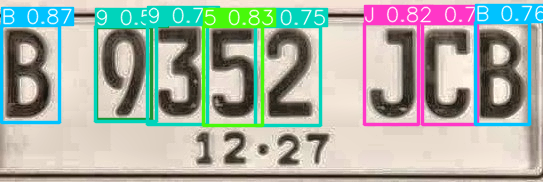

tensor([[1.82015e+00, 2.56104e+01, 5.95660e+01, 1.22389e+02, 8.69211e-01, 1.10000e+01],
        [2.03782e+02, 2.61102e+01, 2.62800e+02, 1.25272e+02, 8.28619e-01, 5.00000e+00],
        [3.64944e+02, 2.32314e+01, 4.18107e+02, 1.24845e+02, 8.24979e-01, 1.90000e+01],
        [4.75044e+02, 2.28783e+01, 5.29535e+02, 1.24580e+02, 7.57987e-01, 1.10000e+01],
        [2.55973e+02, 2.63701e+01, 3.20446e+02, 1.25289e+02, 7.51397e-01, 9.00000e+00],
        [1.47882e+02, 2.43757e+01, 2.07779e+02, 1.24034e+02, 7.27799e-01, 9.00000e+00],
        [4.22193e+02, 2.31170e+01, 4.77762e+02, 1.24568e+02, 7.03019e-01, 1.90000e+01],
        [9.59748e+01, 2.67781e+01, 1.56035e+02, 1.21035e+02, 5.80785e-01, 9.00000e+00],
        [9.61801e+01, 2.73021e+01, 1.51224e+02, 1.19144e+02, 4.85254e-01, 8.00000e+00]], device='cuda:0')


In [1]:
import cv2
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./runs/train/exp37/weights/best.pt')

# Load an image
img_pil = Image.open('./cropped_5.jpg')
img_np = np.array(img_pil)
img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(img_bgr):
    img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(img_lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    img_lab_clahe = cv2.merge((l_clahe, a, b))
    img_bgr_clahe = cv2.cvtColor(img_lab_clahe, cv2.COLOR_Lab2BGR)
    return img_bgr_clahe

img_bgr_clahe = apply_clahe(img_bgr)

# Resize and normalize the image
img_resized = cv2.resize(img_bgr_clahe, (640, 640))
img_normalized = img_bgr_clahe/ 255.0
img_pil_ready = Image.fromarray((img_normalized * 255).astype(np.uint8))

# Inference
results = model(img_pil_ready)

# Detected objects as a tensor
detected_objects = results.xyxy[0]

# Sort detections by X1 value
detections_sorted = detected_objects[detected_objects[:, 0].argsort()]

# Mapping class IDs to their corresponding labels
names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

# Print a header for better readability
print(f"{'X1':>6} {'Y1':>6} {'X2':>6} {'Y2':>6} {'Confidence':>12} {'Class':>6}")

# Iterate through each sorted detection and print the results with class names
for detection in detections_sorted:
    x1, y1, x2, y2, conf, cls_id = detection
    class_name = names[int(cls_id.item())]  # Convert class ID to corresponding class name
    print(f"{x1.item():6.2f} {y1.item():6.2f} {x2.item():6.2f} {y2.item():6.2f} {conf.item():12.8f} {class_name:>6}")

# Convert the resized BGR image back to RGB for display
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Draw rectangles and labels on the image
for detection in detections_sorted:
    x1, y1, x2, y2, conf, cls_id = detection
    start_point = (int(x1), int(y1))
    end_point = (int(x2), int(y2))
    color = (255, 0, 0)  # Blue color in RGB
    thickness = 2
    cv2.rectangle(img_rgb, start_point, end_point, color, thickness)

    class_name = names[int(cls_id.item())]
    label = f"{class_name} {conf.item():.2f}"
    cv2.putText(img_rgb, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

results.print()
results.show()

# Print detected bounding box, confidence and class
print(results.xyxy[0])


In [6]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image at {image_path} could not be read.")
        return None
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize the grayscale image
    normalized_gray = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    plt.imshow(cv2.cvtColor(normalized_gray, cv2.COLOR_BGR2RGB))
    
    # Apply Otsu's thresholding for black and white
    (thresh,img_plate_bw) = cv2.threshold(normalized_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    plt.imshow(cv2.cvtColor(img_plate_bw, cv2.COLOR_BGR2RGB))

    img_plate_bw = cv2.morphologyEx(img_plate_bw, cv2.MORPH_OPEN, kernel)
    plt.imshow(cv2.cvtColor(img_plate_bw, cv2.COLOR_BGR2RGB))

    #Segmentasi Karakter Menggunakan Contours
    # dapatkan kontur dari plat nomor
    contours_plate, hierarchy = cv2.findContours(img_plate_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

    # index contour yang berisi kandidat karakter
    index_chars_candidate = []

    # index counter dari setiap contour di contours_plate
    index_counter_contour_plate = 0

    # duplikat dan ubah citra plat dari gray dan bw ke rgb untuk menampilkan kotak karakter
    img_plate_rgb = cv2.cvtColor(normalized_gray,cv2.COLOR_GRAY2RGB)
    img_plate_bw_rgb = cv2.cvtColor(img_plate_bw, cv2.COLOR_GRAY2RGB)

    # Mencari kandidat karakter
    for contour_plate in contours_plate:

        # dapatkan lokasi x, y, nilai width, height dari setiap kontur plat
        x_char,y_char,w_char,h_char = cv2.boundingRect(contour_plate)
        
        # Dapatkan kandidat karakter jika:
        #   tinggi kontur dalam rentang 40 - 60 piksel
        #   dan lebarnya lebih dari atau sama dengan 10 piksel 
        if h_char >= 40 and h_char <= 60 and w_char >=10:

            # dapatkan index kandidat karakternya
            index_chars_candidate.append(index_counter_contour_plate)

            # gambar kotak untuk menandai kandidat karakter
            cv2.rectangle(img_plate_rgb,(x_char,y_char),(x_char+w_char,y_char+h_char),(0,255,0),2)
            cv2.rectangle(img_plate_bw_rgb,(x_char,y_char),(x_char+w_char,y_char+h_char),(0,255,0),2)

        index_counter_contour_plate += 1
    
    # tampilkan citra plat dengan kotak kandidat karakter
    plt.imshow(cv2.cvtColor(img_plate_rgb, cv2.COLOR_BGR2RGB))

import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Preprocess image function from Step 1

def read_text_from_image(image_path):
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)
    if preprocessed_img is None:
        return
    
    # Initialize EasyOCR Reader
    reader = easyocr.Reader(['en'])  # specify language(s)
    
    # Read text from preprocessed image
    results = reader.readtext(preprocessed_img)
    
    # Display results
    for (bbox, text, prob) in results:
        print(f'Detected text: {text} with confidence: {prob}')
        
    # Optionally display the preprocessed image
    plt.imshow(cv2.cvtColor(preprocessed_img, cv2.COLOR_BGR2RGB))
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()

# Specify the path to your image
image_path = './cropped_2.jpg'
read_text_from_image(image_path)

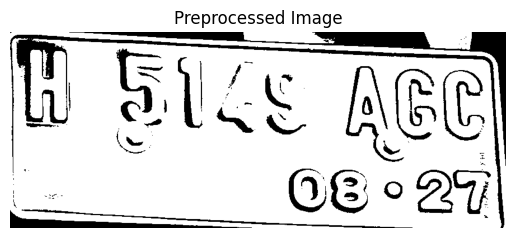

In [2]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image at {image_path} could not be read.")
        return None
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize the grayscale image
    normalized_gray = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    # Apply Otsu's thresholding for black and white
    _, thresh = cv2.threshold(normalized_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours to determine character candidates
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Optionally, filter contours based on size or aspect ratio here
    # For simplicity, we'll just use the thresholded image for OCR
    # but you can refine this step to focus on specific contours
    
    return thresh

image_path = './cropped_15.jpg'

preprocessed_img = preprocess_image(image_path)

# Optionally display the preprocessed image
plt.imshow(cv2.cvtColor(preprocessed_img, cv2.COLOR_BGR2RGB))
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

# import cv2
# import easyocr
# import numpy as np
# from matplotlib import pyplot as plt

# # Preprocess image function from Step 1

# def read_text_from_image(image_path):
#     # Preprocess the image
#     preprocessed_img = preprocess_image(image_path)
#     if preprocessed_img is None:
#         return
    
#     # Initialize EasyOCR Reader
#     reader = easyocr.Reader(['en'])  # specify language(s)
    
#     # Read text from preprocessed image
#     results = reader.readtext(preprocessed_img)
    
#     # Display results
#     for (bbox, text, prob) in results:
#         print(f'Detected text: {text} with confidence: {prob}')
        
#     # Optionally display the preprocessed image
#     plt.imshow(cv2.cvtColor(preprocessed_img, cv2.COLOR_BGR2RGB))
#     plt.title('Preprocessed Image')
#     plt.axis('off')
#     plt.show()

# # Specify the path to your image
# image_path = './cropped_2.jpg'
# read_text_from_image(image_path)

Detected text: F with confidence: 0.9738688509725115
Detected text: Iz5k with confidence: 0.094570592045784
Detected text: NB with confidence: 0.9994765762728769


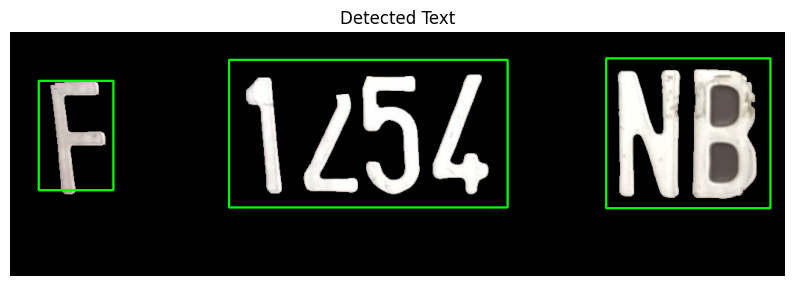

In [1]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import easyocr
import pytesseract


# Load the image
image_path = './cropped_3.jpg'
img = cv2.imread(image_path)

# Ensure the image is loaded
if img is None:
    print(f"Image at {image_path} could not be read.")
else:
    # Convert to grayscale and apply preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized_gray = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    _, img_plate_bw = cv2.threshold(normalized_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img_plate_bw = cv2.morphologyEx(img_plate_bw, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours and filter them
    contours, _ = cv2.findContours(img_plate_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 100: continue
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if 0.2 < aspect_ratio < 1.0 and gray.shape[0] * 0.3 < h < gray.shape[0] * 0.8 and gray.shape[1] * 0.02 < w < gray.shape[1] * 0.15:
            filtered_contours.append(contour)

    # Create a blank mask that matches the image size
    mask = np.zeros_like(img)

    # Draw the filtered contours on the mask with white color and full opacity
    cv2.drawContours(mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    img_masked = cv2.bitwise_and(img, mask)

    # Convert the masked image to RGB for EasyOCR
    img_rgb = cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)

import easyocr

# Create a reader instance for English
reader = easyocr.Reader(['en'])

# Since EasyOCR works with RGB images, we'll convert our BGR image to RGB
# img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Use the reader to detect text from the image
results = reader.readtext(img_rgb)

# Print the detected text
for (bbox, text, prob) in results:
    print(f"Detected text: {text} with confidence: {prob}")

    # Optionally, you can draw the bounding boxes on the image
    top_left = tuple([int(val) for val in bbox[0]])
    bottom_right = tuple([int(val) for val in bbox[2]])
    img_rgb = cv2.rectangle(img_rgb, top_left, bottom_right, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 5))
plt.imshow(img_rgb)
plt.title('Detected Text')
plt.axis('off')
plt.show()